<a href="https://colab.research.google.com/github/atharv1707/MachineLearningProjects/blob/main/Car_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dependencies


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics


Data Collection and Processing


In [2]:
#loading .csv file to pandas dataframe
car_dataset = pd.read_csv('/content/car data.csv')

In [3]:
print(car_dataset.head())

  Car_Name  Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Seller_Type Transmission  Owner  
0      Dealer       Manual      0  
1      Dealer       Manual      0  
2      Dealer       Manual      0  
3      Dealer       Manual      0  
4      Dealer       Manual      0  


In [4]:
#
car_dataset.shape

(301, 9)

In [5]:
#geting info about df
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [6]:
#checking missing values
car_dataset.isnull().sum()



Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [7]:
#checking the distribution of categorical data
print(car_dataset.Fuel_Type.value_counts())
print("------------------------------------")
print(car_dataset.Seller_Type.value_counts())
print("------------------------------------")
print(car_dataset.Transmission.value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
------------------------------------
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
------------------------------------
Manual       261
Automatic     40
Name: Transmission, dtype: int64


In [8]:
# encoding fuel type column
car_dataset.replace({'Fuel_Type': {'Petrol': 0, 'Diesel': 1, 'CNG': 2}}, inplace=True)

# encoding Seller Type column
car_dataset.replace({'Seller_Type': {'Dealer': 0, 'Individual': 1}}, inplace=True)

# encoding transmission column
car_dataset.replace({'Transmission': {'Manual': 0, 'Automatic': 1}}, inplace=True)


In [9]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


In [10]:
#Splitting the data into X and Y
# Target -> Selling Price
# X will contain all data except car_name and selling price
# Y  will contain selling price

X = car_dataset.drop(['Car_Name', 'Selling_Price'], axis = 1)
# if we are dropping the column, we place value of axis as 1, and if we are dropping a row , we are placing the axis value as 0
Y = car_dataset['Selling_Price'] #this will contain only the column name - data


In [11]:
#splitting the data into train , test data
# X_train -> contains training set
# Y_train -> This represents the target or output variable for the training dataset
# X_test -> contains features and stuff for testing, which model has not seen before
# Y_ test - > the target varibale which model hasn't seen before


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size =0.1, random_state = 2 )

Model Training


1.   Linear Regression



In [12]:
#load the LR model
lin_reg = LinearRegression()


In [13]:
lin_reg.fit(X_train, Y_train)

LinearRegression()

In [17]:
training_data_pred = lin_reg.predict(X_train) #we will compare this to our Y-train

In [18]:
# R squared error
error_score = metrics.r2_score(Y_train, training_data_pred)
print("R squarred error : " , error_score )


R squarred error :  0.8799451660493711


Plotting the values of actual and predicted values

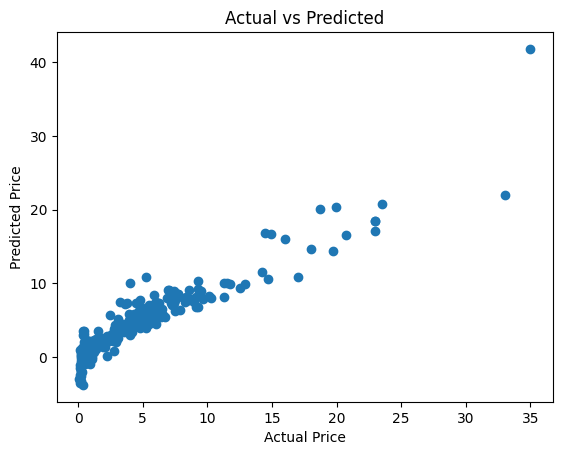

In [19]:
plt.scatter(Y_train ,training_data_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted")
plt.show()


In [20]:
test_data_pred = lin_reg.predict(X_test)


In [22]:
error_score_1 = metrics.r2_score(Y_test, test_data_pred)
print("R squarred error : " , error_score_1 )

R squarred error :  0.8365766715027051


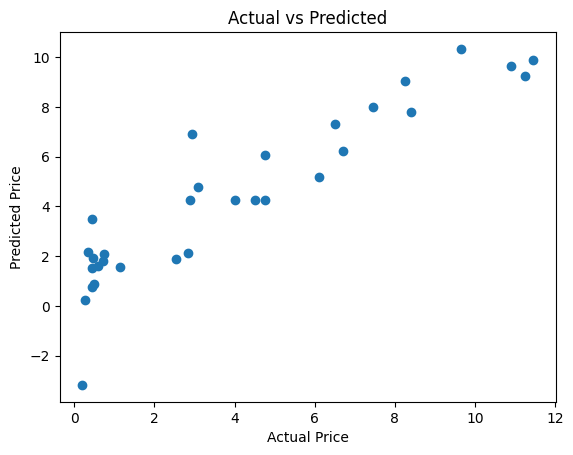

In [23]:
plt.scatter(Y_test ,test_data_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted")
plt.show()


2. Lasso Regression
